# House Price Prediction in King County(USA) using Linear Regression
Dataset from kaggle: [House_Sales_in_King_County](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)<br>
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
<br>
#### Dataset Features Explaination
* `id` : self explanatory

* `date` : date on which house sold

* `price` : price on which house sold

* `bedrooms` : number of bedrooms

* `bathrooms` : number of bathrooms

* `sqft_living` : Square footage of the appartment living space

* `sqft_lot`: Square footage of land space

* `floors` : Number of floors

* `waterfront` : A dummy variable for whether appartment was overlooking the waterfront or not

* `view` : An index 0 - 4 of how good view of the property was

* `condition` : An index 0 - 5 of condition of appartment

* `grade` : An index 0 - 13, where 1-3 for short buildings construction and design, 7 for average construction and design, and 11-13 have high quality level construction and design.

* `sqft_above` : The squarefoot of interior housing space that is above ground level

* `sqft_basement` : The squarefoot of interior housing space that is below ground level

* `yr_built` : The year when house intially built

* `yr_renovated` : The year when house's last renovation

* `zipcode` : what zipcode area the house is in

* `lat` : lattitude

* `long` : longitude

* `sqft_living15` : Square footage of the appartment living space for nearest 15 neighbors

* `sqft_lot15` : Square footage of the land lots for nearest 15 neighbors

In [1]:
# import libraries
import pandas as pd
import numpy as np
# for visualization of data
import matplotlib.pyplot as plt
import seaborn as sns
#model splitting and creation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# scaling model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#metrics
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import warnings

In [2]:
# basic methods to run initially
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_theme()
sns.set_palette('deep')

## Data Reading
We have data in csv file downloaded in local system.

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print(f'Dataset consist of {df.shape[1]} features and {df.shape[0]} rows.')

Dataset consist of 21 features and 21613 rows.


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [6]:
df.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [7]:
# unique values in each columns
for col in df.columns:
    print(f'Unique values in {col}: {df[col].unique().shape[0]}')

Unique values in id: 21436
Unique values in date: 372
Unique values in price: 4028
Unique values in bedrooms: 13
Unique values in bathrooms: 30
Unique values in sqft_living: 1038
Unique values in sqft_lot: 9782
Unique values in floors: 6
Unique values in waterfront: 2
Unique values in view: 5
Unique values in condition: 5
Unique values in grade: 12
Unique values in sqft_above: 946
Unique values in sqft_basement: 306
Unique values in yr_built: 116
Unique values in yr_renovated: 70
Unique values in zipcode: 70
Unique values in lat: 5034
Unique values in long: 752
Unique values in sqft_living15: 777
Unique values in sqft_lot15: 8689


## Handling Null values
We dont have any null or blank values in our dataset

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## EDA
We will started our EDA with correlation between features

<AxesSubplot:title={'center':'Pearson Correlation of features'}>

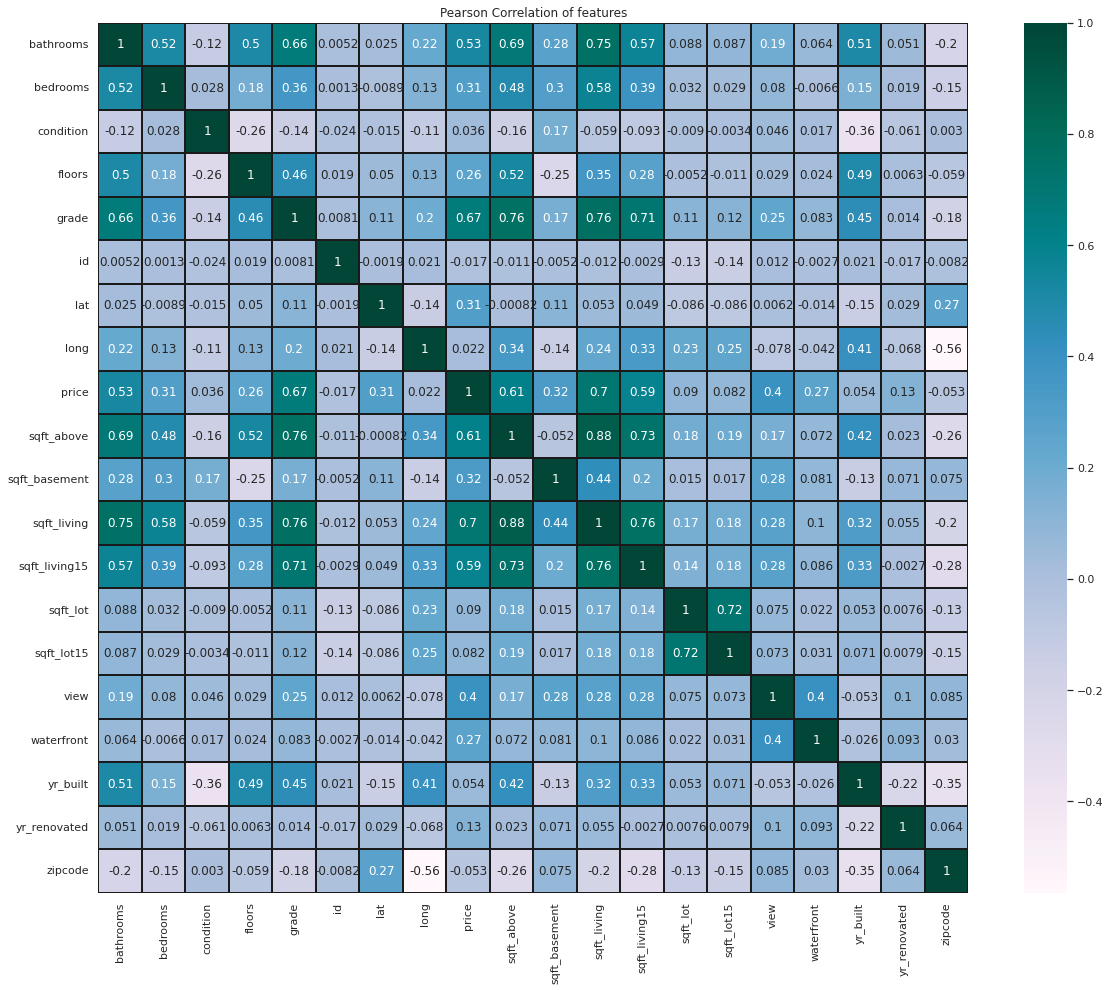

In [9]:
# Thanks to: https://www.kaggle.com/code/arthurtok/feature-ranking-rfe-random-forest-linear-models/notebook

str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = df[num_list]
f, ax = plt.subplots(figsize=(20, 16))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)

Too much numbers, lets see numbers useful to us

In [10]:
# FINDING CORRELATION
# Thanks to: https://www.kaggle.com/sid321axn/house-price-prediction-gboosting-adaboost-etc
# As id and date columns are not important to predict price so we are discarding it for finding correlation
featuress = df.iloc[:,3:].columns.tolist()
target = df.iloc[:,2].name

In [11]:
# Finding Correlation of price woth other variables to see how many variables are strongly correlated with price
correlations = {}
for f in featuress:
    data_temp = df[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

<AxesSubplot:>

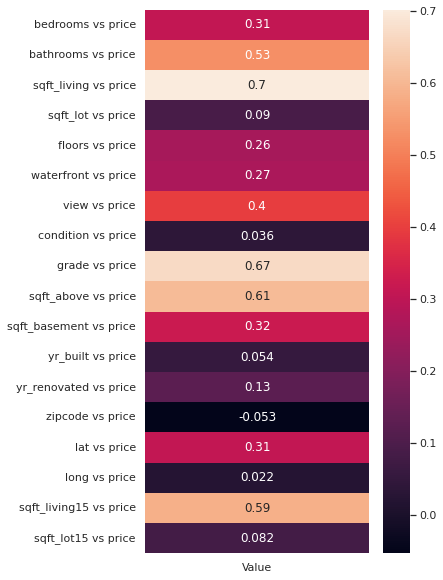

In [12]:
# Printing all the correlated features value with respect to price which is target variable
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

# plot heatmap 
plt.figure(figsize=(5,10))
sns.heatmap(data_correlations, annot=True)

**Zipcode** is negatively correlated with price hence we can discard that column

### Handling Outliers
we will try to find if any outliers are present in our dataset using boxplot

In [13]:
df.describe(percentiles=[.01, .05, .1, .5, .9, .92, .93, .94, .96, .97, .99])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
1%,1.220339e+08,1.535004e+05,2.000000,1.000000,720.000000,1.013120e+03,1.000000,0.000000,0.000000,3.000000,5.000000,700.000000,0.000000,1904.000000,0.000000,98001.000000,47.256872,-122.408000,950.000000,1191.240000
5%,5.124803e+08,2.100000e+05,2.000000,1.000000,940.000000,1.800000e+03,1.000000,0.000000,0.000000,3.000000,6.000000,850.000000,0.000000,1915.000000,0.000000,98004.000000,47.310300,-122.387000,1140.000000,1999.200000
10%,1.036000e+09,2.450000e+05,2.000000,1.000000,1090.000000,3.322200e+03,1.000000,0.000000,0.000000,3.000000,6.000000,970.000000,0.000000,1926.000000,0.000000,98008.000000,47.350300,-122.372000,1256.000000,3666.600000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
90%,8.732028e+09,8.870000e+05,4.000000,3.000000,3250.000000,2.139760e+04,2.000000,0.000000,0.000000,4.000000,9.000000,2950.000000,970.000000,2007.000000,0.000000,98155.000000,47.727900,-122.022000,2930.000000,17852.400000
92%,8.944464e+09,9.500000e+05,5.000000,3.250000,3420.000000,2.851660e+04,2.000000,0.000000,2.000000,4.000000,9.000000,3100.000000,1030.000000,2008.000000,0.000000,98166.000000,47.735104,-122.010000,3040.000000,22402.960000


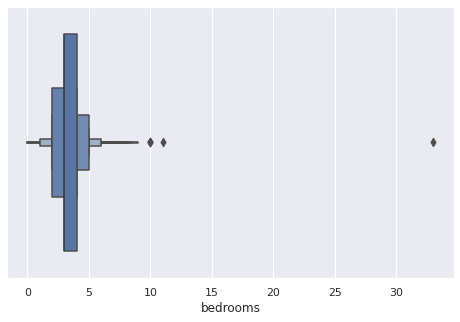

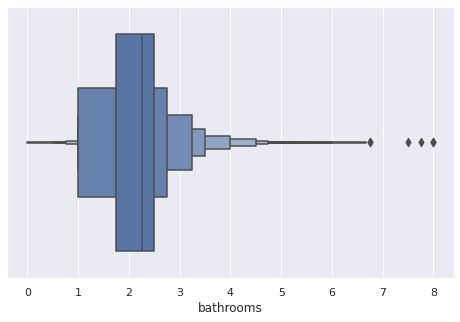

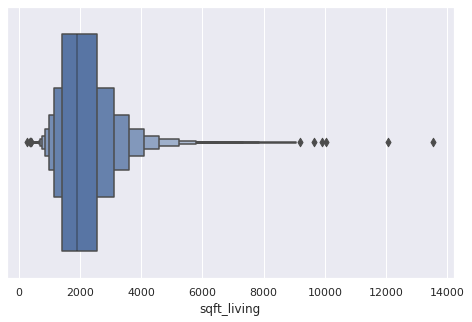

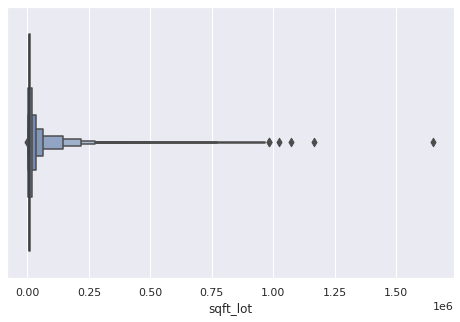

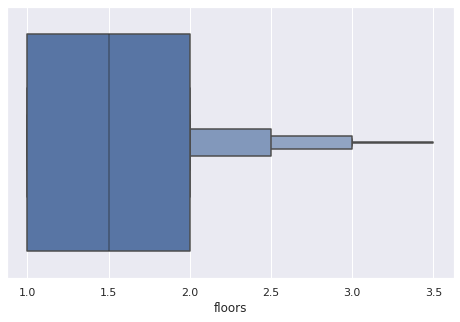

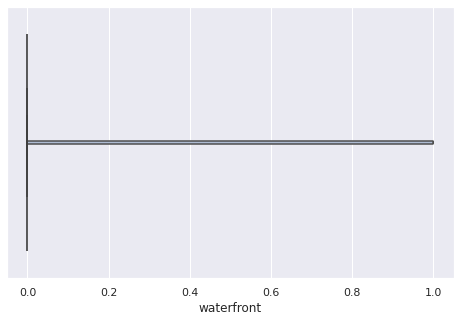

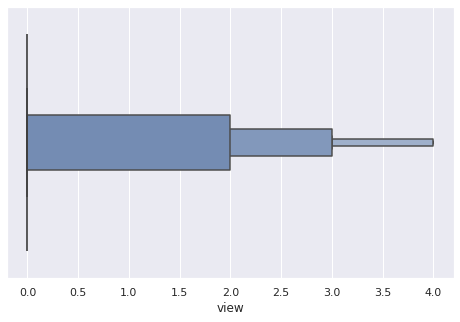

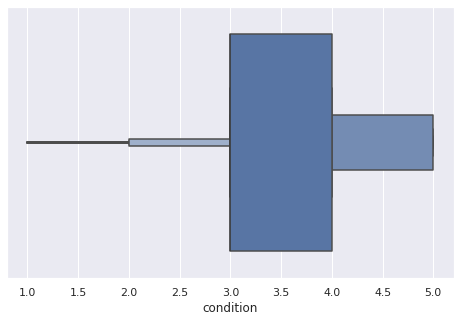

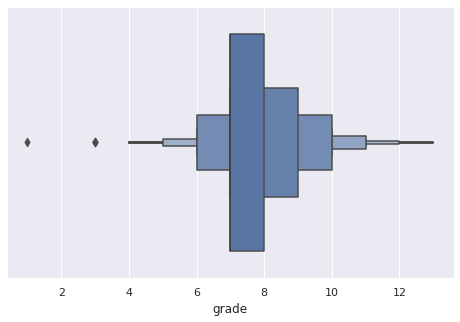

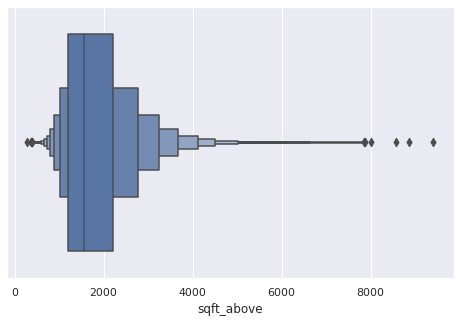

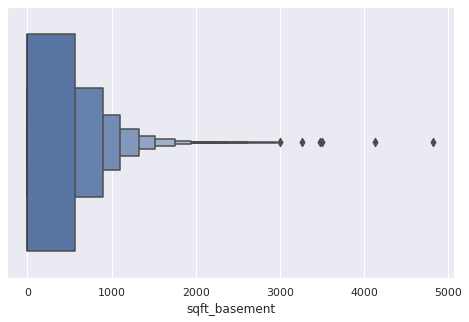

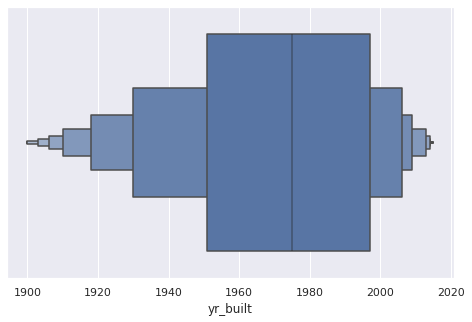

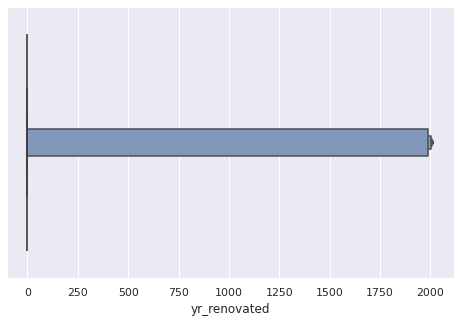

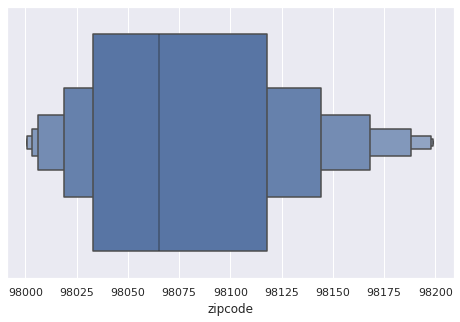

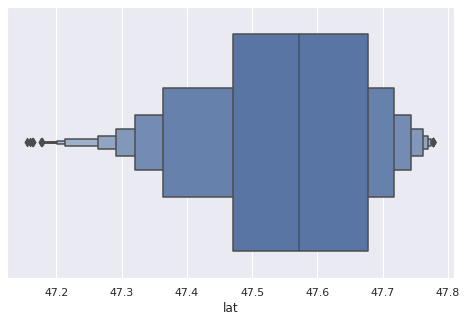

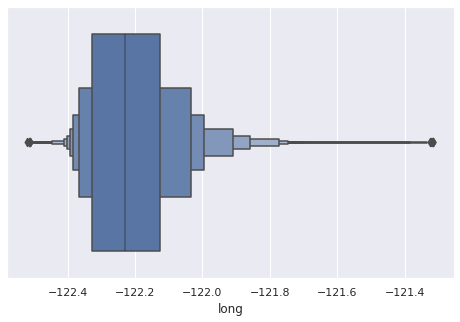

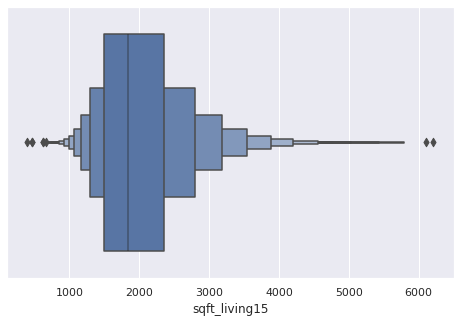

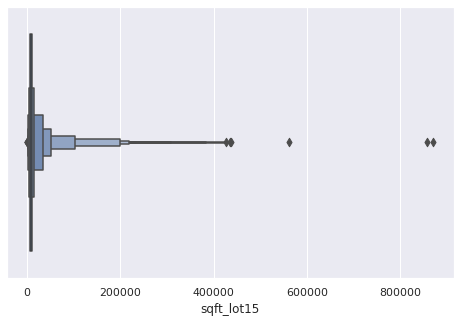

In [14]:
#plot boxplot
for col in featuress:
    plt.figure(figsize=(8,5))
    sns.boxenplot(x=df[col])
    plt.show()

<AxesSubplot:xlabel='price'>

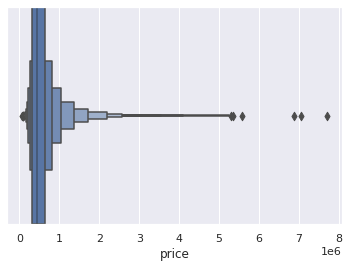

In [15]:
sns.boxenplot(x=df['price'], width=1.0)

As per above boxplot we can see outliers present in some features which can affect our model prformace.
We need to handle that outliers.
<br><br>
**Observation**
* bedrooms: less than 9
* bathrooms: less than 7
* sqft_living: less than 10000
* sqft_lot: less 1.0
* grade: greater than 4
* sqft_above: less than 8000
* sqft_basement: less than 3000
* sqft_living15: less than 6000
* sqft_lot15: less than 400000

#### Removing Outliers

In [16]:
df = df[(
        (df['price'] <= 1000000) & 
        (df['price'] > 170000) & 
        (df['bedrooms']<9)&
        (df['bathrooms']<7)&
        (df['sqft_living']<10000)&
        (df['sqft_lot']<1.065000e+04)&
        (df['grade']>4)&
        (df['sqft_above']<8000)&
        (df['sqft_basement']<3000)&
        (df['sqft_living15']<6000)&
        (df['sqft_lot15']<400000)
    )]
df.shape

(15148, 21)

### Visualizing Regression line

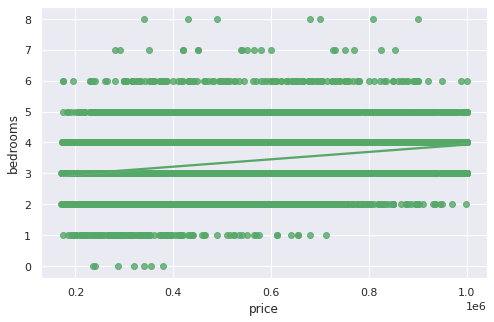

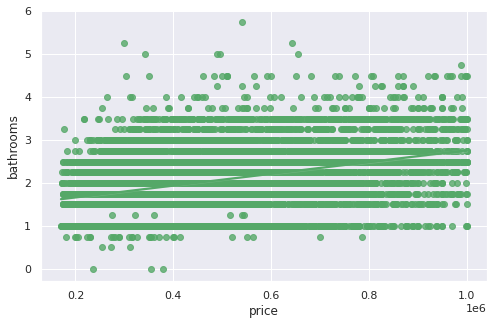

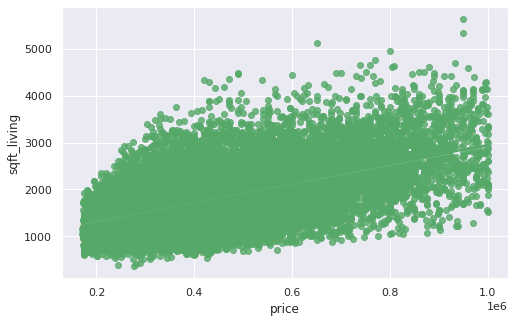

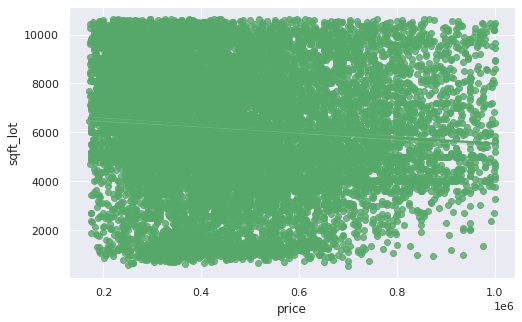

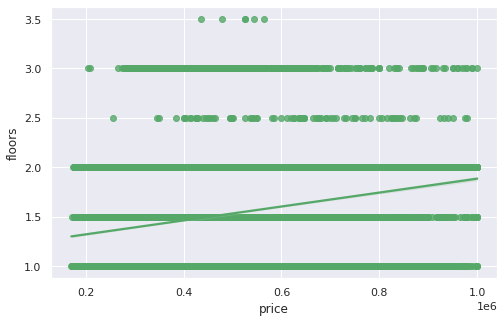

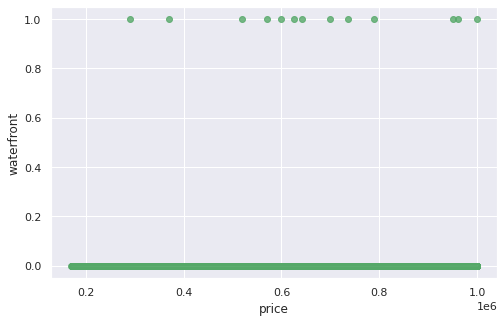

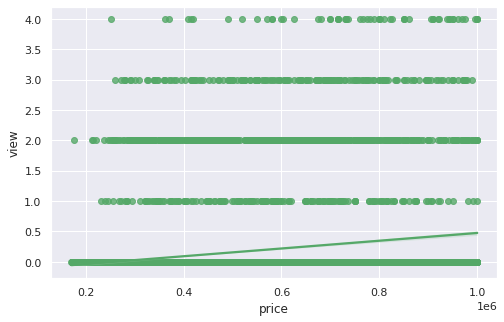

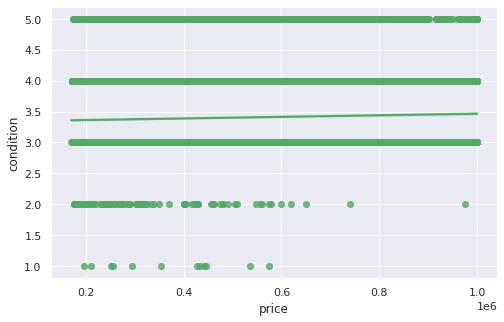

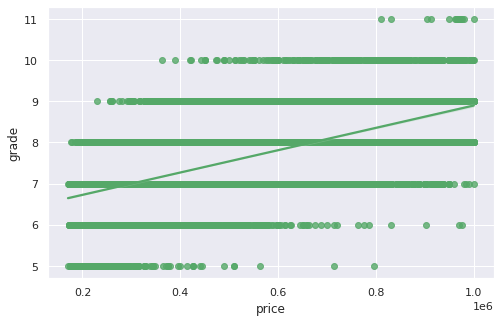

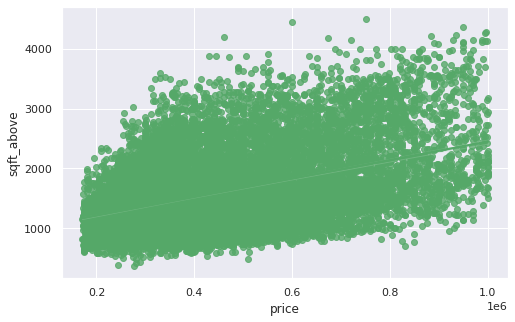

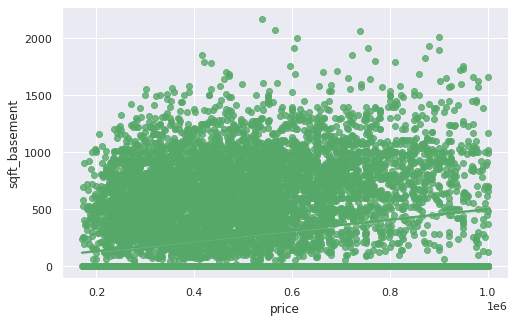

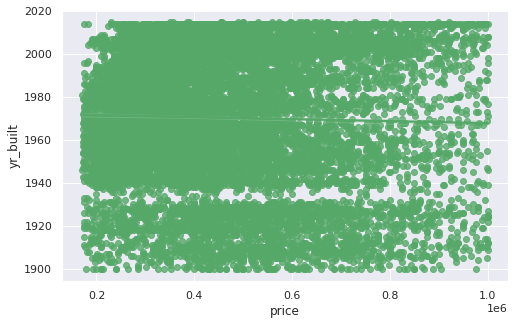

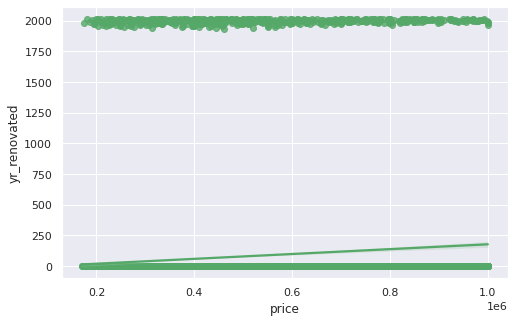

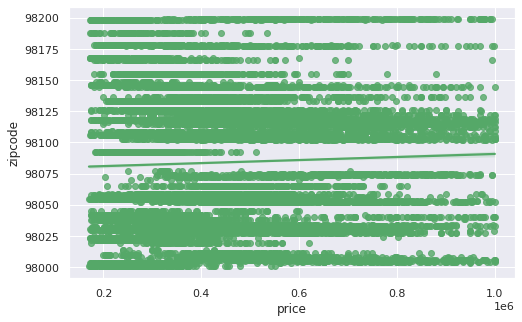

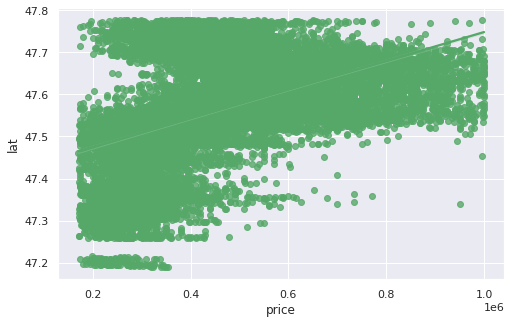

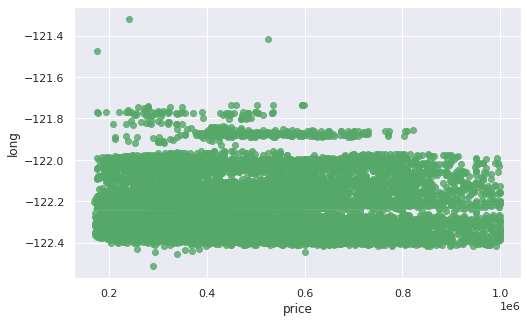

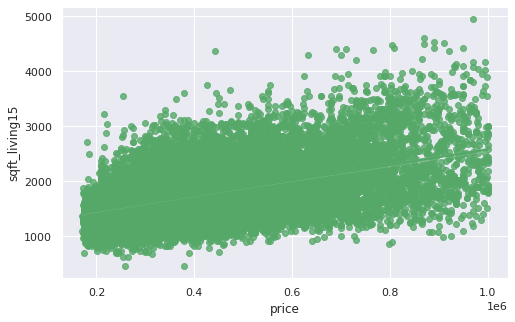

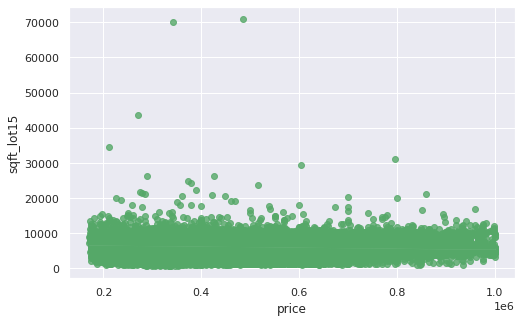

In [17]:
# plotting graph for selected features
for col in featuress:
    plt.figure(figsize=(8,5))
    sns.regplot(x=df['price'],y=df[col], color='g')
    plt.show()

As We observed above, We can drop some columns from our dataset for better performance

In [18]:
drop_col = ['view', 'waterfront', 'id','zipcode', 'date', 'yr_renovated']
df.drop(columns=drop_col, inplace=True)
col_use = list(df.columns)

## Split dataset

In [19]:
# seperate dependent and independent features
X = df[col_use]
X.drop(columns=['price'], inplace=True)
y = df.price

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Initialize model and train using fit() method


In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Testing Accuracy:**

In [22]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train accuracy {round(train_score*100,1)}%")
print(f"Test accuracy {round(test_score*100,1)}%")

Train accuracy 67.9%
Test accuracy 66.9%


**R2 Square**

In [23]:
y_pred = model.predict(X_train)

In [24]:
r2_score(y_train, y_pred)

0.6793992150789261